In [1]:
import numpy as np
import pandas as pd
import difflib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
movies_data = pd.read_csv('/movies.csv', encoding='latin1')
movies_data['index'] = range(len(movies_data))

In [3]:
movies_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,index
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",3
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,4


In [4]:
movies_data['index'] = range(len(movies_data))

In [5]:
movies_data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,index
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",8802
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",8803
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,8804
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",8805
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,8806


In [6]:
movies_data.shape

(8807, 13)

In [7]:
count = movies_data['release_year'].value_counts()

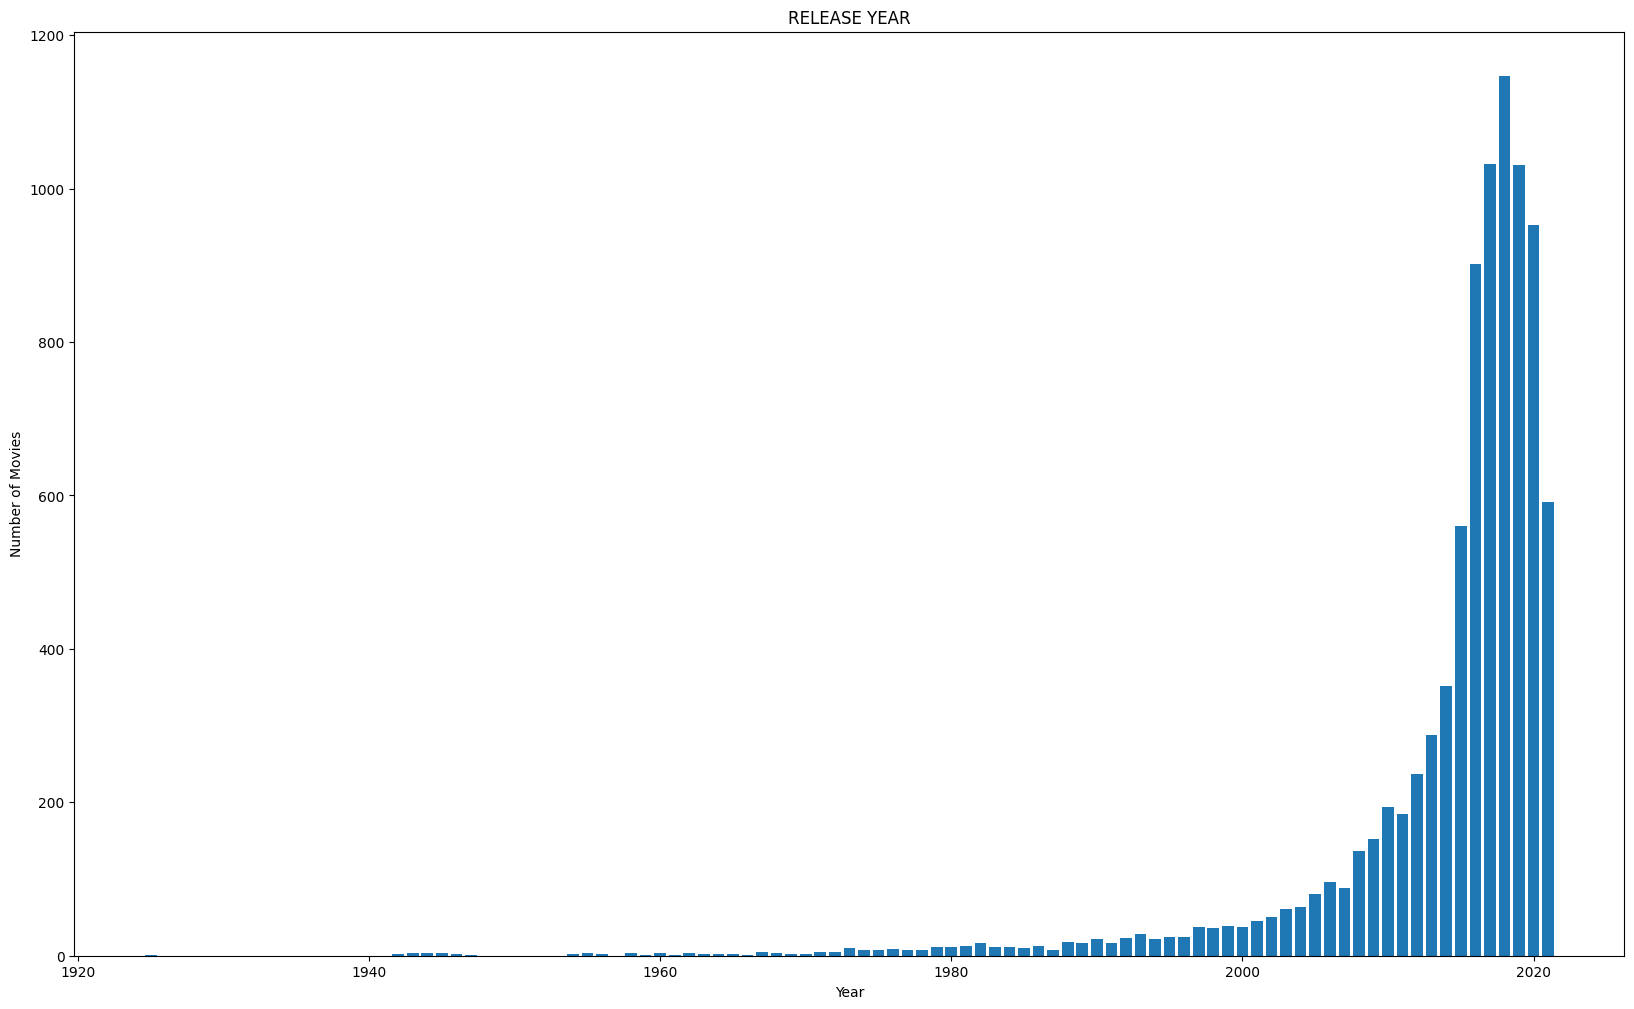

In [8]:
if 'release_year' in movies_data.columns:
    count = movies_data['release_year'].value_counts()
    plt.figure(figsize=(20, 12))
    plt.bar(count.index, count.values)
    plt.title('RELEASE YEAR')
    plt.xlabel('Year')
    plt.ylabel('Number of Movies')
    plt.show()

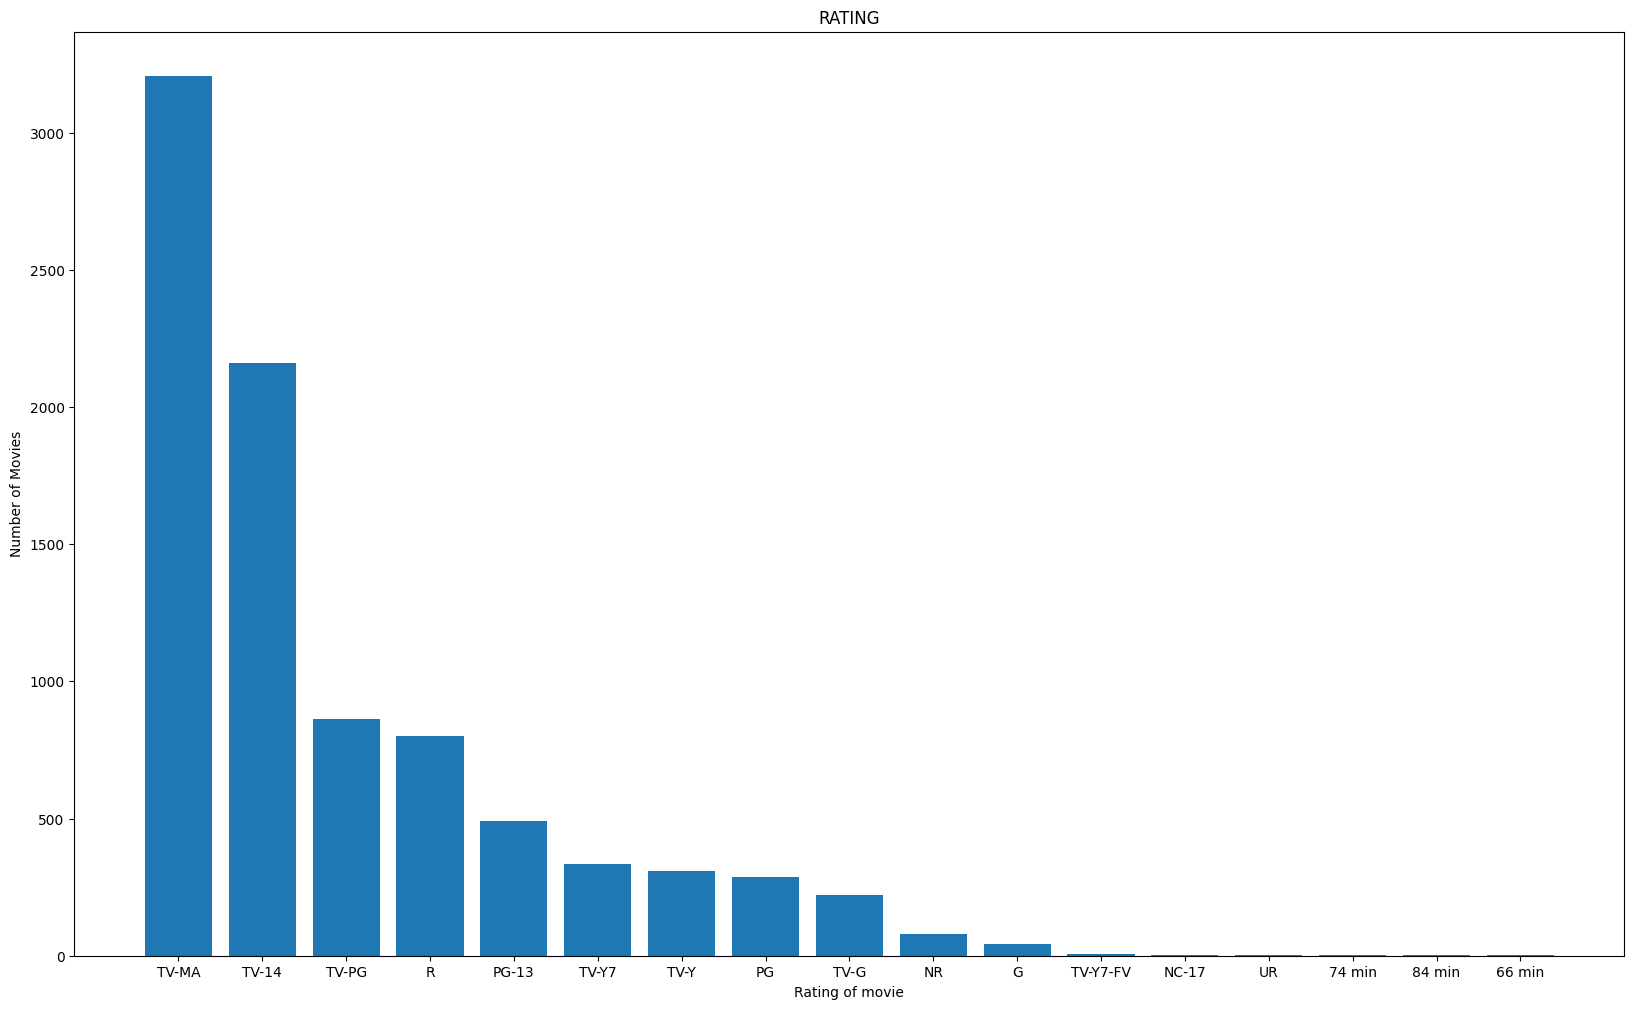

In [9]:
if 'rating' in movies_data.columns:
    rating = movies_data['rating'].value_counts()
    plt.figure(figsize=(20, 12))
    plt.bar(rating.index, rating.values)
    plt.title('RATING')
    plt.xlabel('Rating of movie')
    plt.ylabel('Number of Movies')
    plt.show()

In [10]:
# Feature engineering
selected_features = ['rating', 'title', 'listed_in', 'cast', 'director']
for feature in selected_features:
    movies_data[feature] = movies_data[feature].fillna('')

In [11]:
combined_features = (
    movies_data['rating'] + ' ' +
    movies_data['title'] + ' ' +
    movies_data['listed_in'] + ' ' +
    movies_data['cast'] + ' ' +
    movies_data['director']
)

In [12]:
# TF-IDF and cosine similarity
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_features)
similarity = cosine_similarity(feature_vectors)

In [13]:
# Input favorite movie
movie_name = input('Enter your favorite movie name: ')
list_of_all_titles = movies_data['title'].tolist()
find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)


Enter your favorite movie name: conjuring


In [14]:
close_match = find_close_match[0]
index = movies_data[movies_data.title == close_match]['index'].values[0]
similarity_score = list(enumerate(similarity[index]))
sorted_similar_movies = sorted(similarity_score, key=lambda x: x[1], reverse=True)

In [15]:
# Generate top 10 recommendations
recommended_titles = []
i = 1
for movie in sorted_similar_movies:
    index = movie[0]
    title_from_index = movies_data[movies_data.index == index]['title'].values[0]
    if title_from_index.lower() != close_match.lower():  # avoid recommending the same movie
        recommended_titles.append(title_from_index)
        i += 1
    if i > 10:
        break

print("\nRecommended Titles:")
for title in recommended_titles:
    print("-", title)


Recommended Titles:
- The Conjuring 2
- The Long Dumb Road
- Eli
- Haunting on Fraternity Row
- Insidious
- The Departed
- Safe House
- The End of the Tour
- In the Tall Grass
- Shimmer Lake


In [18]:
# Precision, Recall, F1 Score calculation
user_liked_titles_input = input('\nEnter the titles of movies or TV shows you like (comma-separated): ')
user_liked_titles = [title.strip().lower() for title in user_liked_titles_input.split(',')]
recommended_titles_lower = [title.strip().lower() for title in recommended_titles]

y_true = [1 if title in user_liked_titles else 0 for title in recommended_titles_lower]
y_pred = [1] * len(recommended_titles_lower)

# Display metrics
precision = precision_score(y_true, y_pred, zero_division=0)
recall = recall_score(y_true, y_pred, zero_division=0)
f1 = f1_score(y_true, y_pred, zero_division=0)

print("\nPrecision:", round(precision, 2))
print("Recall:", round(recall, 2))
print("F1 Score:", round(f1, 2))


Enter the titles of movies or TV shows you like (comma-separated):  The Conjuring 2 , The Long Dumb Road ,Eli , Haunting on Fraternity Row , Insidious , The Departed , Safe House , The End of the Tour , In the Tall Grass ,Shimmer Lake

Precision: 1.0
Recall: 1.0
F1 Score: 1.0
